In [56]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [76]:
iter_max = 5001

env = gym.make('MountainCar-v0')

print('Action Space: {}'.format(env.action_space))
print('Observation Space: {}'.format(env.observation_space)) 

Action Space: Discrete(3)
Observation Space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


In [79]:
actions = np.arange(env.action_space.n)
states = obs_to_state(env, env.observation_space.high) + 1

initial_learning_rate = 1
min_lr = 0.003
gamma = 0.9
eps = 1
begin_epsilon = 0.1

obs = env.reset()
q_table = np.random.uniform(low = -1, high = 1, 
                            size = (int(states[0]), int(states[1]), len(actions)))

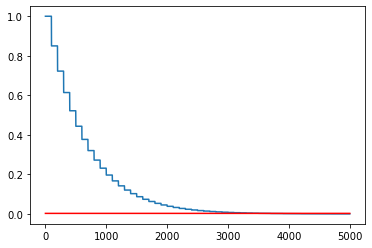

In [91]:
test_lr = np.linspace(1, 5000, 5000)
test_min_lr = [0.003]*5000
plt.plot(test_lr, 0.85**(test_lr//100))
plt.plot(test_lr, test_min_lr, color="red")

In [59]:
def obs_to_state(env, obs):
    env_low = env.observation_space.low
    diff = (obs - env_low)*np.array([10, 100])
    return np.round(diff, 0).astype(int)

Iteration #0 -- Max Attitude = -0.355363 Total reward = -200.
Iteration #100 -- Max Attitude = -0.489852 Total reward = -200.
Iteration #200 -- Max Attitude = -0.375148 Total reward = -200.
Iteration #300 -- Max Attitude = -0.409810 Total reward = -200.
Iteration #400 -- Max Attitude = -0.275341 Total reward = -200.
Iteration #500 -- Max Attitude = -0.432581 Total reward = -200.
Iteration #600 -- Max Attitude = -0.457828 Total reward = -200.
Iteration #700 -- Max Attitude = -0.377483 Total reward = -200.
Iteration #800 -- Max Attitude = -0.367496 Total reward = -200.
Iteration #900 -- Max Attitude = -0.290249 Total reward = -200.
Iteration #1000 -- Max Attitude = -0.272601 Total reward = -200.
Iteration #1100 -- Max Attitude = -0.321129 Total reward = -200.
Iteration #1200 -- Max Attitude = -0.425938 Total reward = -200.
Iteration #1300 -- Max Attitude = -0.214989 Total reward = -200.
Iteration #1400 -- Max Attitude = -0.350205 Total reward = -200.
Iteration #1500 -- Max Attitude = -0.

Text(0.5, 1.0, 'Average Reward vs Episodes')

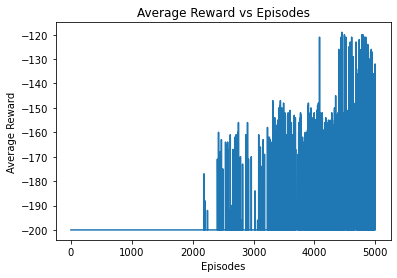

In [80]:
log_frequency = 100
episode_rewards = []
episode_attitude = []

for i in range(iter_max):

    cur_state = obs_to_state(env, env.reset())
    sum_reward, iepoch_max_atti = 0.0, env.observation_space.low[0]

    done = False
    eta = max(min_lr, initial_learning_rate * (0.85 ** (i//100)))
    while not done:

        action = choose_action(cur_state, i/iter_max)

        next_state, reward, done, _ = env.step(action)
        iepoch_max_atti = max(iepoch_max_atti, next_state[0])
        sum_reward += reward

        if done and next_state[0] >= 0.5: 
            q_predict = q_table[cur_state[0], cur_state[1], action]
            q_table[cur_state[0], cur_state[1], action] = reward 
            next_state = obs_to_state(env, next_state)
        else:
            q_predict = q_table[cur_state[0], cur_state[1], action]
            next_state = obs_to_state(env, next_state)
            
            q_target = reward + gamma * np.max(q_table[next_state[0], next_state[1], :])
            q_table[cur_state[0], cur_state[1], action] += eta * (q_target - q_predict) 
            
            cur_state = next_state
    
    episode_rewards.append(sum_reward)
    episode_attitude.append(iepoch_max_atti)
    if i % log_frequency == 0:
        print('Iteration #%d -- Max Attitude = %f Total reward = %d.' %(i, iepoch_max_atti, sum_reward))
        
env.close()
plt.plot(episode_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

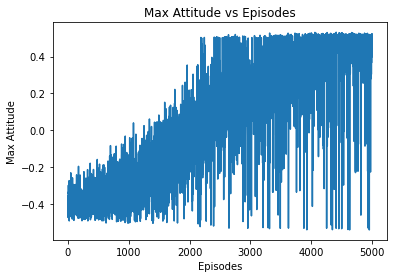

In [93]:
plt.plot(episode_attitude)
plt.xlabel('Episodes')
plt.ylabel('Max Attitude')
plt.title('Max Attitude vs Episodes')

In [88]:
solution_policy = np.argmax(q_table, axis=2)
solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]

run_episode(env, solution_policy, True)
env.close()

In [86]:
def run_episode(env, policy=None, render=False):
    obs = env.reset()
    for _ in range(10001):
        if render:
            env.render()
        state = obs_to_state(env, obs)
        action = policy[state[0]][state[1]]

        obs, reward, done, _ = env.step(action)
        if done:
            break

In [89]:
def choose_action(state, process):
    if np.random.uniform(0, 1) < (begin_epsilon + (eps-begin_epsilon) * process):
        action = np.argmax(q_table[state[0], state[1], :])
    else:
        action = np.random.randint(0, len(actions))
    return action